# Lectura y presentación de imágenes con Python y OpenCV
## Fundamentos de Análisis de Imágenes

- Nombre 1: Laura García González 
- Nombre 2: Lucía Martínez Miramontes
- Nombre 3: Ada Moral Merino

### OpenCV
[OpenCV](https://opencv.org/) es la mayor librería para el procesamiento de imágenes en Python. Permite leer, visualizar y operar con imágenes en formato de arrays de NumPy.
Su código fuente es de [libre acceso](https://github.com/opencv/opencv) y está bien documentada (https://docs.opencv.org/4.x/index.html), además de ser multiplataforma.

También proporciona varios tutoriales para aprender a manejar la librería: https://docs.opencv.org/4.x/d9/df8/tutorial_root.html

### NumPy y Matplotlib
Como librerías auxiliares se usarán [NumPy](https://numpy.org/), puesto que las imágenes se leen internamente como arrays multidimensionales, y [Matplotlib](https://matplotlib.org/) para la visualización de imaǵenes. También es posible usar OpenCV para visualizar imágenes, pero usando jupyter notebook es recomendable hacerlo con Matplotlib.

Primero, importaremos las librerías necesarias. Antes será necesario instalarlas con el siguiente comando:

In [12]:
!pip install opencv-python numpy matplotlib

In [13]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

Seguidamente vamos a leer una imagen de ejemplo. Se guardará en un array numpy tridimensional. Las dimensiones representan, respectivamente, el alto, ancho y canales de colores de la imagen.

In [14]:
img_bgr = cv2.imread('rose.jpg')
print(type(img_bgr))  # La imagen se guarda en un array NumPy
print(img_bgr.shape)  # Las dimensiones del array representan alto x ancho x canales
print(img_bgr.dtype)  # Las imágenes por defecto se leen como enteros sin signo de 8 bits

<class 'numpy.ndarray'>
(851, 1280, 3)
uint8


El tipo de datos del array donde se guarda la imagen es importante. Si bien normalmente los valores de los píxeles se representan con enteros sin signo en el rango 0-255, en algunas ocasiones es necesario convertirlos a otro formato, por  ejemplo números en coma flotante en el rango 0-1.

Ahora visualizaremos la imagen con Matplotlib. La imagen debería representar una rosa de color rojo:

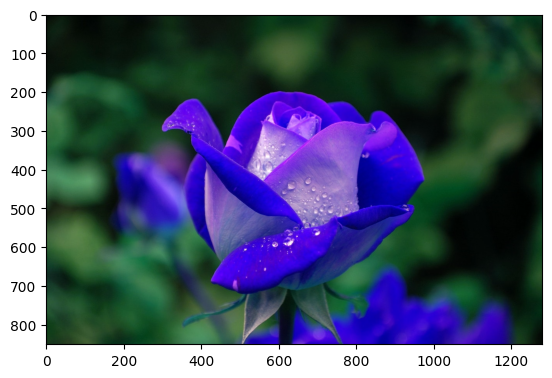

In [15]:
plt.imshow(img_bgr)

Como podemos ver, la rosa aparece en color violeta. Esto es debido al formato en el que se leen las imágenes en OpenCV. Matplotlib procesa las imágenes en formato RGB (red, green, blue), mientras que OpenCV lo hace en formato BGR, por lo que es necesario intercambiar el primer y último canal de la imagen antes de visualizarla.

Vamos a usar la función [cvtColor](https://docs.opencv.org/4.x/d8/d01/group__imgproc__color__conversions.html#ga397ae87e1288a81d2363b61574eb8cab) de OpenCV para corregir los colores. Queremos convertir el formato BGR a RGB, así que usaremos el código de conversion cv2.COLOR_BGR2RGB. Para más información sobre los códigos de conversión: https://docs.opencv.org/4.x/de/d25/imgproc_color_conversions.html

**Ejercicio**: utiliza la función [cvtColor](https://docs.opencv.org/4.x/d8/d01/group__imgproc__color__conversions.html#ga397ae87e1288a81d2363b61574eb8cab) para convertir la imagen de formato BGR a RGB y visualiza el resultado utilizando plt.imshow. Guardar la imagen en la variable *img_rgb*.

In [16]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

In [17]:
# Comparación del mismo píxel en ambas imágenes
print('BGR', img_bgr[300, 500, :])
print('RGB', img_rgb[300, 500, :])

BGR [ 63   0 225]
RGB [225   0  63]


**Ejercicio**: hacer que la mitad derecha de la imagen se muestre en formato RGB y la mitad izquierda en formato BGR, y visualizar el resultado.

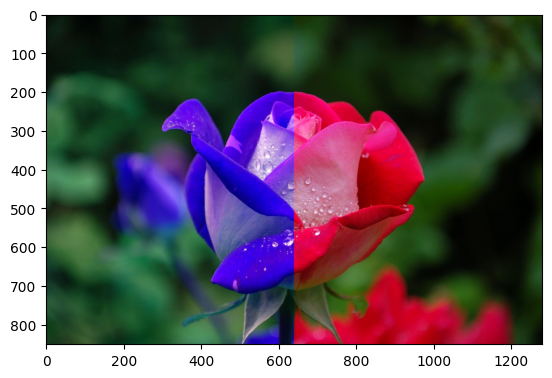

In [18]:
altura, ancho = img_bgr.shape[:2]
punto_medio = midpoint = ancho // 2
combined_img = img_rgb.copy()
combined_img[:, :punto_medio] = img_bgr[:, :punto_medio]
plt.imshow(combined_img)

En muchas ocasiones es necesario leer la imagen en escala de grises para poder usar algunos algoritmos. Para ello, podemos usar de nuevo la función cvtColor o leer de nuevo la imagen:

(851, 1280)


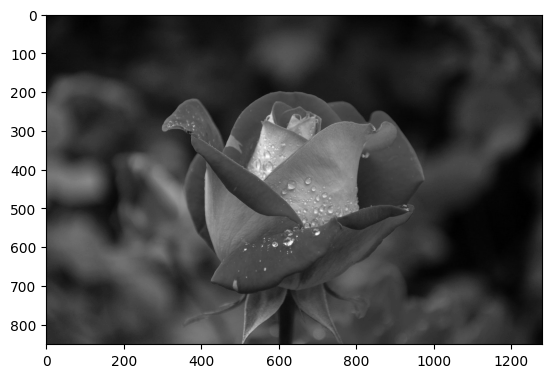

In [19]:
# Convertir con cvtColor
img_bgr = cv2.imread('rose.jpg')
img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
print(img_gray.shape)  # La imagen pasa de tener 3 canales de color a únicamente 1
plt.imshow(img_gray, cmap='gray')

**Ejercicio**: leer la imagen directamente en escala de grises con [imread](https://docs.opencv.org/4.x/d4/da8/group__imgcodecs.html#ga288b8b3da0892bd651fce07b3bbd3a56), mostrar las dimensiones y visualizarla.

(851, 1280)


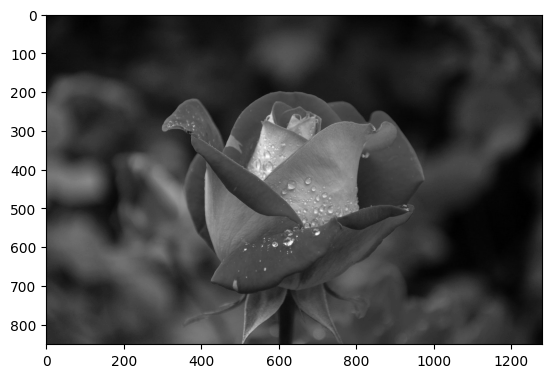

In [20]:
print(img_gray.shape)  # Las dimensiones del array representan alto x ancho x canales
plt.imshow(img_gray, cmap='gray')

Otro espacio de color ampliamente utilizado es HSV (hue, saturation, value). En este caso, los canales se relacionan con diferentes aspectos de la imagen:
<img src="https://upload.wikimedia.org/wikipedia/commons/4/4e/HSV_color_solid_cylinder.png" alt="HSV" width="300"/>
El canal H (0-180) permite cambiar el color, el canal S (0-255) la saturación o pureza de los colores y el canal V (0-255), el brillo.
Por ejemplo, para hacer que la imagen anterior aparezca más descolorida, podemos ajustar el canal S reduciendo sus valores.

**Ejercicio**: lee y transforma la imagen de ejemplo para que sus colores aparezcan aclarados usando el espacio de colores HSV, muestra los resultados con plt.imshow

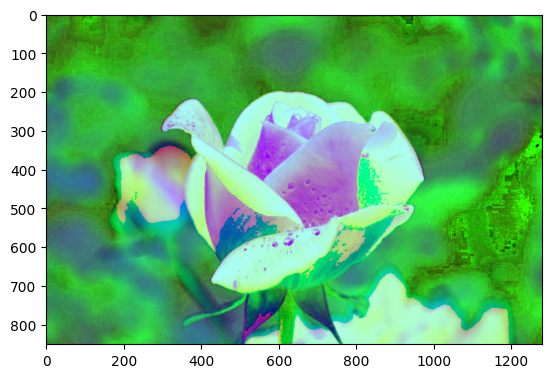

In [ ]:
img_hsv = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2HSV)
img_hsv[:, 1, :] = img_hsv[:, 1, :] * 0.5


plt.imshow(img_hsv)


Para guardar imágenes, podemos usar la función [imwrite](https://docs.opencv.org/4.x/d4/da8/group__imgcodecs.html#gabbc7ef1aa2edfaa87772f1202d67e0ce), especificando el nombre del archivo y la imagen que queremos guardar.
Es importante recordar que OpenCV necesita imágenes en formato BGR antes de guardarlas.

**Ejercicio**: guardar la imagen del ejemplo anterior en un archivo jpg, leer el archivo guardado y visualizarla de nuevo.

In [55]:
img_aclarada = cv2.cvtColor(img_hsv, cv2.COLOR_HSV2BGR)
exito = cv2.imwrite('imagen_aclarada.jpg', img_aclarada)
